# Model_2

## Random Forest Classifier



The machine learning algorithm used in the provided code is Random Forest Classifier. It's a popular ensemble learning method that operates by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or the mean prediction (regression) of the individual trees.

In this code:

The dataset is preprocessed using pipelines, including handling missing values, scaling numerical features, and one-hot encoding categorical features.
The Random Forest Classifier is then applied to the preprocessed data to predict the probabilities of individuals receiving the H1N1 vaccine and the seasonal vaccine.
The predicted probabilities are rounded to one decimal place and saved in a CSV file along with the respondent IDs.
Random Forest Classifier is a versatile and powerful algorithm commonly used for classification tasks, especially when dealing with structured data.

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier

# Load the datasets
train_features = pd.read_csv("training_set_features.csv")
train_labels = pd.read_csv("training_set_labels.csv")
test_features = pd.read_csv("test_set_features.csv")


# Split features and target variables
X_train = train_features.drop(columns=['respondent_id'])
y_train_h1n1 = train_labels['h1n1_vaccine']
y_train_seasonal = train_labels['seasonal_vaccine']
X_test = test_features.drop(columns=['respondent_id'])

# Preprocessing pipeline
numeric_features = X_train.select_dtypes(include=['int64']).columns
categorical_features = X_train.select_dtypes(include=['object']).columns

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Append classifier to preprocessing pipeline
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', RandomForestClassifier())])

# Train the model for H1N1 vaccine
clf.fit(X_train, y_train_h1n1)

# Predict probabilities for H1N1 vaccine
y_pred_proba_h1n1 = clf.predict_proba(X_test)[:, 1]  # Probability of class 1 (vaccine received)
y_pred_proba_h1n1_rounded = [round(prob, 1) for prob in y_pred_proba_h1n1]  # Round to 1 decimal place

# Train the model for seasonal vaccine
clf.fit(X_train, y_train_seasonal)

# Predict probabilities for seasonal vaccine
y_pred_proba_seasonal = clf.predict_proba(X_test)[:, 1]  # Probability of class 1 (vaccine received)
y_pred_proba_seasonal_rounded = [round(prob, 1) for prob in y_pred_proba_seasonal]  # Round to 1 decimal place

# Save the probabilities
predictions_df = pd.DataFrame({'respondent_id': test_features['respondent_id'],
                               'h1n1_vaccine': y_pred_proba_h1n1_rounded,
                               'seasonal_vaccine': y_pred_proba_seasonal_rounded})
predictions_df.to_csv('predictionsmodel_2.csv', index=False)


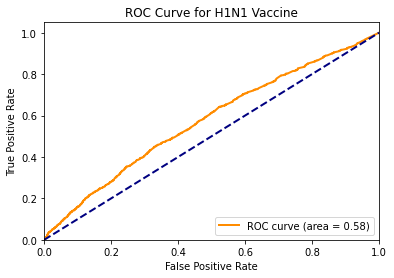

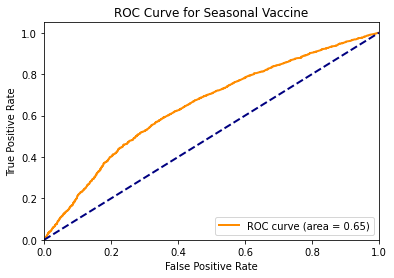

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score

# Split features and target variables
X_train, X_val, y_train_h1n1, y_val_h1n1, y_train_seasonal, y_val_seasonal = train_test_split(
    train_features.drop(columns=['respondent_id']),
    train_labels['h1n1_vaccine'],
    train_labels['seasonal_vaccine'],
    test_size=0.2,
    random_state=42
)

# Preprocessing pipeline
numeric_features = X_train.select_dtypes(include=['int64']).columns
categorical_features = X_train.select_dtypes(include=['object']).columns

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Append classifier to preprocessing pipeline
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', RandomForestClassifier())])

# Train the model for H1N1 vaccine
clf.fit(X_train, y_train_h1n1)

# Predict probabilities for H1N1 vaccine
y_pred_proba_h1n1 = clf.predict_proba(X_val)[:, 1]  # Probability of class 1 (vaccine received)

# Calculate ROC curve for H1N1 vaccine
fpr_h1n1, tpr_h1n1, _ = roc_curve(y_val_h1n1, y_pred_proba_h1n1)

# Compute ROC AUC for H1N1 vaccine
roc_auc_h1n1 = roc_auc_score(y_val_h1n1, y_pred_proba_h1n1)

# Plot ROC curve for H1N1 vaccine
plt.figure()
plt.plot(fpr_h1n1, tpr_h1n1, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_h1n1)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for H1N1 Vaccine')
plt.legend(loc="lower right")
plt.show()

# Repeat the above steps for the seasonal vaccine
# Train the model for seasonal vaccine
clf.fit(X_train, y_train_seasonal)

# Predict probabilities for seasonal vaccine
y_pred_proba_seasonal = clf.predict_proba(X_val)[:, 1]  # Probability of class 1 (vaccine received)

# Calculate ROC curve for seasonal vaccine
fpr_seasonal, tpr_seasonal, _ = roc_curve(y_val_seasonal, y_pred_proba_seasonal)

# Compute ROC AUC for seasonal vaccine
roc_auc_seasonal = roc_auc_score(y_val_seasonal, y_pred_proba_seasonal)

# Plot ROC curve for seasonal vaccine
plt.figure()
plt.plot(fpr_seasonal, tpr_seasonal, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_seasonal)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Seasonal Vaccine')
plt.legend(loc="lower right")
plt.show()


In [5]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predictions for the H1N1 vaccine
y_pred_h1n1 = clf.predict(X_train)

# Predictions for the seasonal vaccine
y_pred_seasonal = clf.predict(X_train)

# Calculate accuracy, precision, recall, and F1-score for H1N1 vaccine
accuracy_h1n1 = accuracy_score(y_train_h1n1, y_pred_h1n1)
precision_h1n1 = precision_score(y_train_h1n1, y_pred_h1n1)
recall_h1n1 = recall_score(y_train_h1n1, y_pred_h1n1)
f1_h1n1 = f1_score(y_train_h1n1, y_pred_h1n1)

# Calculate accuracy, precision, recall, and F1-score for seasonal vaccine
accuracy_seasonal = accuracy_score(y_train_seasonal, y_pred_seasonal)
precision_seasonal = precision_score(y_train_seasonal, y_pred_seasonal)
recall_seasonal = recall_score(y_train_seasonal, y_pred_seasonal)
f1_seasonal = f1_score(y_train_seasonal, y_pred_seasonal)

# Print the evaluation metrics
print("Evaluation metrics for H1N1 vaccine:")
print(f"Accuracy: {accuracy_h1n1:.2f}")
print(f"Precision: {precision_h1n1:.2f}")
print(f"Recall: {recall_h1n1:.2f}")
print(f"F1-score: {f1_h1n1:.2f}\n")

print("Evaluation metrics for seasonal vaccine:")
print(f"Accuracy: {accuracy_seasonal:.2f}")
print(f"Precision: {precision_seasonal:.2f}")
print(f"Recall: {recall_seasonal:.2f}")
print(f"F1-score: {f1_seasonal:.2f}")


Evaluation metrics for H1N1 vaccine:
Accuracy: 0.63
Precision: 0.34
Recall: 0.78
F1-score: 0.47

Evaluation metrics for seasonal vaccine:
Accuracy: 0.91
Precision: 0.88
Recall: 0.93
F1-score: 0.91
